* User ID	- Unique identifier for each user (not useful for ML models)
* Gender -	Categorical	Gender of the user (Male / Female)
* Age	Numerical -	Age of the user (e.g., 19-60 years)
* EstimatedSalary - Estimated annual salary of the user (e.g., 15,000 - 150,000)
* Purchased	-	Target variable (0 = Not Purchased, 1 = Purchased)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the necessary package

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Loading the dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Social_Network_Ads.csv")

In [4]:
df.isna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [5]:
df.shape

(400, 5)

In [6]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Displays the first five rows in the dataset

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Displays the last five rows of the dataset

In [8]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [9]:
df.drop('User ID', axis=1,inplace=True)

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Now find Unique categorical Values

In [11]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Convert the categorical values to numerical values for ML prediction

In [12]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
5,1,27,58000,0
6,0,27,84000,0
7,0,32,150000,1
8,1,25,33000,0
9,0,35,65000,0


Check to see if the transformation has happenned

In [13]:
df['Gender'].unique()

array([1, 0])

Check to see if there are any Null Values, If yes then you need to fill them or remove them based on the data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


As there are no null values check to see is there any duplicates

In [15]:
df.duplicated().sum()

20

Removing the duplicates

In [16]:
df.drop_duplicates()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


Let us describe the dataset and transpose it for easy visualisation

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,400.0,0.4900,0.500526,0.0,0.00,0.0,1.0,1.0
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


Removing the Outliers

In [18]:
from scipy import stats
import numpy as np
numerical_cols = ['Gender','Age','EstimatedSalary','Purchased']
z_scores = np.abs(stats.zscore(df[numerical_cols]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers = df[~outliers]

In [19]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,400.0,0.4900,0.500526,0.0,0.00,0.0,1.0,1.0
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [20]:
df_no_outliers.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


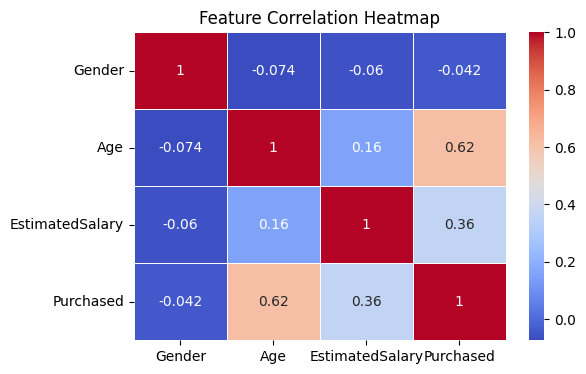

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
X = df_no_outliers.drop(columns=['Purchased'])
y = df_no_outliers['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
with open('Social_Network.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [27]:
with open('Social_Network.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

predictions = loaded_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

In [28]:
print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.38
R-squared (R2): 0.4054


In [29]:
df_no_outliers.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [31]:
import pandas as pd
new_data = pd.DataFrame({
    'Gender': [1],
    'Age':[35],
    'EstimatedSalary':[60000]
})
new_data_scaled = loaded_scaler.transform(new_data)
new_prediction = loaded_model.predict(new_data_scaled)
print(f"Prediction: {new_prediction[0]:.2f}")

Prediction: 0.00
